# Steam Data Over Time

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [70]:
# Load and clean STEAM data
steam_survey = pd.read_csv('https://raw.githubusercontent.com/jdegene/steamHWsurvey/master/shs.csv')
steam_dates = steam_survey[pd.to_datetime(steam_survey['date']).dt.year >= 2015].reset_index().drop(labels='index',axis=1)
steam_gpu = steam_dates[steam_dates['category'] == 'Video Card Description']
steam_gpu = steam_gpu.dropna()
steam_gpu['date'] = pd.to_datetime(steam_gpu['date'])

steam_gpu.head()
steam_gpu.reset_index()

,index,date,category,name,change,percentage
0,292,2015-01-01,Video Card Description,AMD Radeon HD 4350,0.0025,0.0025
1,293,2015-01-01,Video Card Description,AMD Radeon HD 4650,0.0029,0.0029
2,294,2015-01-01,Video Card Description,AMD Radeon HD 4670,0.0024,0.0024
3,295,2015-01-01,Video Card Description,AMD Radeon HD 4850,0.0026,0.0026
4,296,2015-01-01,Video Card Description,AMD Radeon HD 4870,0.0016,0.0016
...,...,...,...,...,...,...
9538,34708,2023-10-01,Video Card Description,NVIDIA GeForce RTX 4070 Laptop GPU,-0.0003,0.0016
9539,34709,2023-10-01,Video Card Description,NVIDIA GeForce RTX 4070 Ti,0.0005,0.0090
9540,34710,2023-10-01,Video Card Description,NVIDIA GeForce RTX 4080,0.0011,0.0062
9541,34711,2023-10-01,Video Card Description,NVIDIA GeForce RTX 4090,-0.0010,0.0061


In [75]:
# Remove Strange entires
steam_gpu = steam_gpu[~steam_gpu['date'].isin(steam_gpu[(steam_gpu['name'] == 'Other') & (steam_gpu['percentage'] > 0.5)]['date'])]

In [66]:
steam_gpu = steam_gpu[(steam_gpu['name'].str.contains("AMD Radeon RX")) |
                      (steam_gpu['name'].str.contains("AMD Radeon Vega")) |
                      (steam_gpu['name'].str.contains("NVIDIA GeForce GTX")) |
                      (steam_gpu['name'].str.contains("NVIDIA GeForce RTX"))]

In [77]:
steam_gpu['name'].unique()

array(['AMD Radeon HD 4350', 'AMD Radeon HD 4650', 'AMD Radeon HD 4670',
       'AMD Radeon HD 4850', 'AMD Radeon HD 4870', 'AMD Radeon HD 5450',
       'AMD Radeon HD 5500 Series', 'AMD Radeon HD 5570',
       'AMD Radeon HD 5670', 'AMD Radeon HD 5750', 'AMD Radeon HD 5770',
       'AMD Radeon HD 5850', 'AMD Radeon HD 5870', 'AMD Radeon HD 6310',
       'AMD Radeon HD 6320', 'AMD Radeon HD 6410D', 'AMD Radeon HD 6450',
       'AMD Radeon HD 6480G', 'AMD Radeon HD 6490M',
       'AMD Radeon HD 6520G', 'AMD Radeon HD 6530D', 'AMD Radeon HD 6570',
       'AMD Radeon HD 6620G', 'AMD Radeon HD 6670', 'AMD Radeon HD 6750M',
       'AMD Radeon HD 6770', 'AMD Radeon HD 6850', 'AMD Radeon HD 6870',
       'AMD Radeon HD 6950', 'AMD Radeon HD 6970', 'AMD Radeon HD 7310',
       'AMD Radeon HD 7480D', 'AMD Radeon HD 7520G + 7670M',
       'AMD Radeon HD 7540D', 'AMD Radeon HD 7550M',
       'AMD Radeon HD 7560D', 'AMD Radeon HD 7640G + 7670M',
       'AMD Radeon HD 7660G + 7670M', 'AMD Radeon HD

In [78]:
def get_release_year(gpu_name: str):
    if gpu_name.startswith('AMD Radeon R4'):
        return 2014
    elif gpu_name.startswith('AMD Radeon R5'):
        return 2014

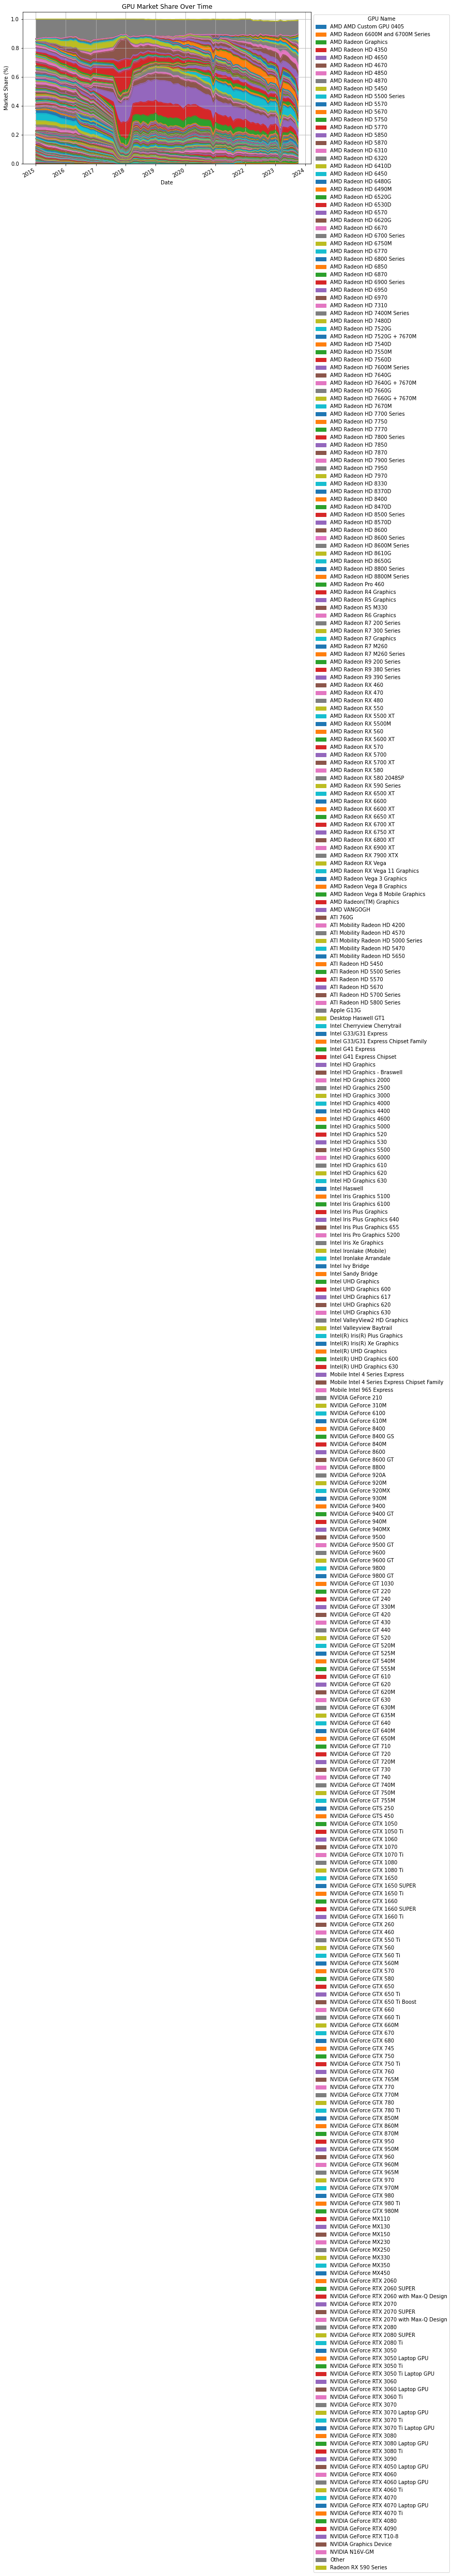

In [79]:
%matplotlib inline
df_pivot = steam_gpu.pivot(index='date', columns='name', values='percentage')
# Fill NaN values with 0 if necessary
df_pivot = df_pivot.fillna(0)

# Create a stacked area plot
ax = df_pivot.plot.area(stacked=True, figsize=(10, 6))

# Customize the plot
ax.set_title('GPU Market Share Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Market Share (%)')
ax.legend(title='GPU Name', bbox_to_anchor=(1, 1), loc='upper left')
ax.grid(True)

# Show the plot
plt.show()